# [NTDS'18] tutorial 3: Plotting with Matplotlib
[ntds'18]: https://github.com/mdeff/ntds_2018
adapted from [ntds'17 matplotlib demo](https://github.com/mdeff/ntds_2017/blob/master/demos/05_matplotlib.ipynb)

[Eda Bayram](http://lts4.epfl.ch/bayram), [EPFL LTS4](http://lts4.epfl.ch)

## Ojective
In this lab session we will provide a short tutorial on ``Matplotlib``. We will present:

1) The ``matplotlib.pyplot`` module that provides a procedural interface similar to that of Matlab

2) The Object Oriented API of Matplotlib, which allows for maximum flexibility 

## 1. The Pyplot API

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example 1.1: Plot a linear function

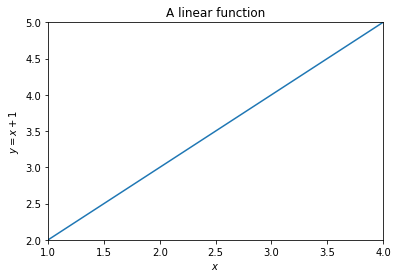

In [2]:
x = np.array([1,2,3,4])
y = x + 1
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=x+1$')
plt.axis([x.min(), x.max(), y.min(), y.max()]);
plt.title('A linear function');

plt.show()

As you have used before, you may activate inline backend, i.e.,**``%matplotlib inline``**, which directly prints the figure under the cell executed. Then you do not need to run the last line i.e., **``plt.show()``**, to visualize the figure.

### Example 1.2: Figure and axis properties

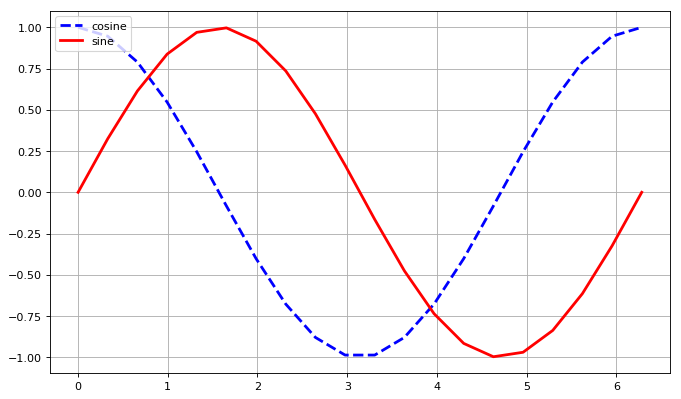

In [3]:
x= np.linspace(0, 2*np.pi, 20)
y = np.cos(x);
z = np.sin(x)
#initiate the figure settings
plt.figure(figsize=(10, 6), dpi=80) 
plt.plot(x, y, color="blue", linewidth=2.5, linestyle="--", label="cosine");
plt.plot(x, z, color="red",  linewidth=2.5, linestyle="-", label="sine");
plt.legend(loc='upper left');
plt.grid();

plt.show()

### Example 1.3: Subplots

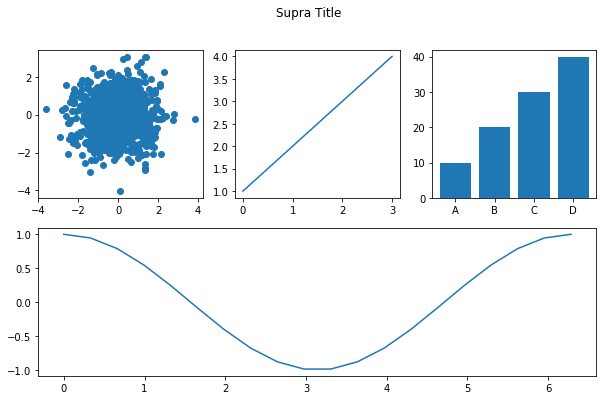

In [5]:
plt.figure(figsize=(10, 6))

# Divide the frame (2x3)
plt.subplot(231);
plt.scatter(np.random.normal(0,1,1024),np.random.normal(0,1,1024))
plt.subplot(232);
plt.plot([1,2,3,4])
plt.subplot(233);
plt.bar(['A', 'B', 'C', 'D'], [10, 20, 30, 40])

# Combine with (2x1) layout
plt.subplot(212);
plt.plot(x,y)
plt.suptitle('Supra Title')

plt.show()

### Example 1.4: Plot the sparsity pattern of a 2-D array.

Create and plot an adjacency matrix for a graph with 30 nodes.

In [6]:
N = 30 # number of nodes
W = np.random.uniform(size=(N, N))  # Fully connected graph.
W[W < 0.8] = 0  # Sparse graph.
W = W + W.T  # Symmetric graph.
np.fill_diagonal(W, 0)  # No self-loops.

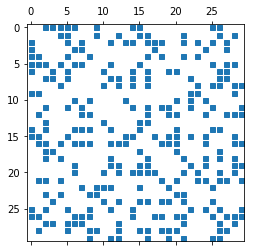

In [7]:
# Visualize the sparsity pattern
plt.spy(W,markersize=5);
plt.show()

Visualization of the weight matrix as an image

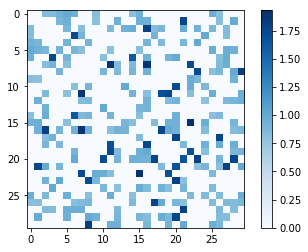

In [8]:
plt.imshow(W, cmap=plt.cm.Blues);
plt.colorbar();
plt.show()

### Example 1.5: Plot a histogram

Let us plot the degree distribution of the graph we created.

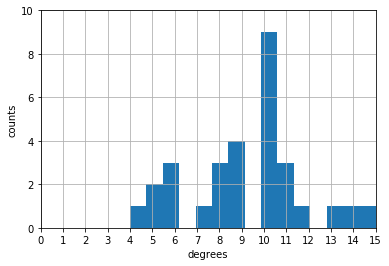

In [10]:
d = (W > 0).sum(axis=0) # number of neighbors for each node
plt.hist(d, bins= d.max());
plt.axis([0,d.max(),0,10])
plt.xticks(np.arange(d.max()+1))
plt.grid()
plt.xlabel('degrees')
plt.ylabel('counts')

plt.show()

### What else can you plot with Pyplot?

Let us have a closer look at what happened when we call ``pyplot`` functions. The first function, e.g.; ``plot()``, ``hist()``, ``imshow()``, creates a figure and each function you call afterwards makes a change on that figure, e.g.; adding lines, adding labels etc. So far we have practiced such simple plots. You can find a full list of all the functions provided by ``Pyplot`` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html).

However, the Object Oriented API of ``Matplotlib`` offers a greater control and flexibility, therefore, it is recommended to new ``Matplotlib`` users to learn how to use it.

## 2. The Object Oriented API

Now, we will create some ``Figure`` and ``Axes`` objects and directly deal with those in an object-oriented manner to customize our plots.

The ``Axes`` represents each individual plot. The axes class will be your "best friend" for creating plots with the OO API and you can find out more about it [here](https://matplotlib.org/api/axes_api.html).

The ``Figure`` will be the final "picture". A ``Figure`` may contain one or more plots. Read further [here](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure).

### Example 2.1: Use Pyplot to create Axes object

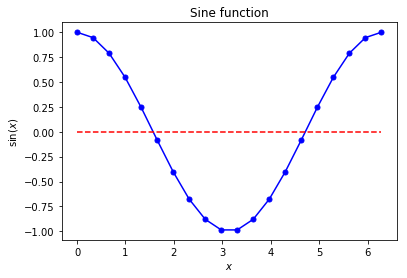

In [11]:
import matplotlib as mpl

ax = plt.subplot(111)
ax.plot(x,y,'.-', markersize=10,color='b')
# Let us add a line indicating 
ax.add_line(mpl.lines.Line2D(x,np.zeros(x.shape),color='r', linestyle='--'));
ax.set_title('Cosine function')
ax.set_xlabel('$x$')
ax.set_ylabel('$\sin(x)$');
plt.show()

In [12]:
print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>


In [13]:
# see all the attributes and operations defined for ax object
dir(ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mo

In [14]:
ax.figure.savefig('cosine.pdf')

Open the file `sine.pdf` to see the plot that you saved.

In [15]:
import IPython.display as ipd
ipd.IFrame('cosine.pdf', width=600, height=300) 

### Example 2.2: Interactive Plotting

In [17]:
#activate the nbagg backend, which enables interactivity within the Jupyter Notebook
%matplotlib nbagg

Let us create a **``Figure``** object using pyplot and interactively play on it.

<IPython.core.display.Javascript object>


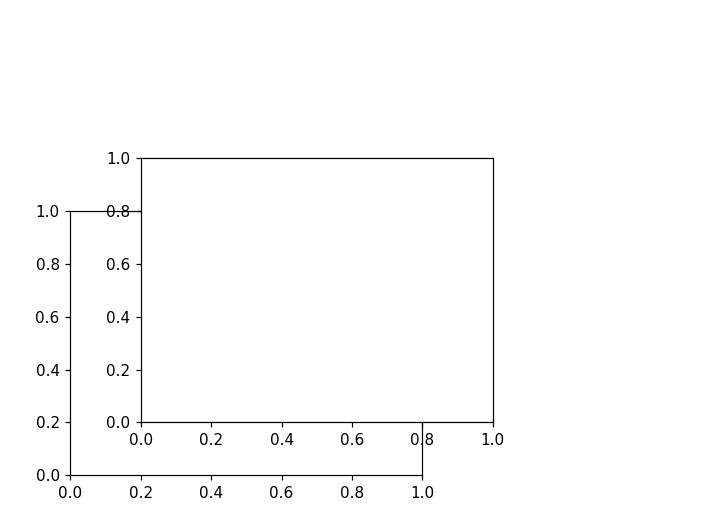

In [21]:
fig = plt.figure()

#### A: Add an axes instance on the figure with ``add_subplot``

In [22]:
ax1 = fig.add_subplot(121)
ax1.plot(x,y)
ax1.set_title('Cosine')
ax2 = fig.add_subplot(122)
ax2.plot(x,z);
ax2.set_title('Sine');

In [23]:
# see the list of axes on the figure
fig.axes

With **``axes.delaxes()``** you will remove the axes object from the figure.

In [24]:
fig.delaxes(ax1)
fig.delaxes(ax2)

#### B: Add an axes instance on the figure with ``add_axes``

In [25]:
ax1 = fig.add_axes([0.1,0.1,.5,.5])
ax1.plot(x,y);

**``add_axes()``** gives more flexibility on the placement of the axis.

In [26]:
ax2 = fig.add_axes([0.2,0.2,.5,.5])
ax2.plot(x,z);

In [27]:
# operations iterating over the axes
for ax in fig.axes:
    ax.grid(True)

With ``axes.clear()`` you will clear the content of the figure.

In [28]:
ax1.clear();
ax2.clear();

Now, you can spend some time to create you own plots with `Matplotlib`. Have fun!

In [ ]:
#your code here